In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/mllab/creditcards.csv")


In [3]:
# Extract features and target variable
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values


In [4]:
# Check the number of features
print("Number of features:", X.shape[1])


Number of features: 30


In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
# Performing Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [7]:
# Initialize ANN
ann = tf.keras.models.Sequential()


In [8]:
# Adding layers to ANN
ann.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=X.shape[1]))
ann.add(tf.keras.layers.Dense(units=6, activation="relu"))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [9]:
# Compile ANN
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])



In [10]:
# Fit ANN to training data
ann.fit(X_train_scaled, Y_train, batch_size=32, epochs=3)


Epoch 1/3
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0180 - accuracy: 0.9972
Epoch 2/3
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 3/3
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0033 - accuracy: 0.9994


In [11]:
# Make predictions
predictions = ann.predict(X_test_scaled) > 0.5
print(predictions)


1781/1781 [==============================] - 3s 1ms/step
[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [16]:
accuracy = accuracy_score(Y_test, (predictions.flatten() > 0.5).astype(int))
print("Accuracy:", accuracy)


Accuracy: 0.9993679997191109


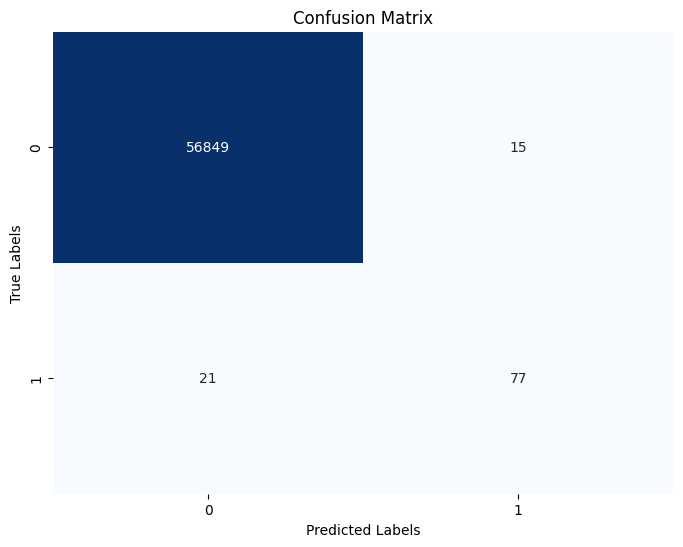

In [14]:

predictions_binary = predictions.astype(int)
cm = confusion_matrix(Y_test, predictions_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()